# Text Classification with 20 Newsgroups Dataset using RNN and LSTM

This notebook demonstrates how to perform text classification using both RNN and LSTM models on the 20 Newsgroups dataset.

### Step 1: Install TensorFlow

In [2]:
!pip install tensorflow

### Step 2: Import Libraries

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Step 3: Load and Preprocess the Dataset

In [2]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Preprocess the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(newsgroups.data)
sequences = tokenizer.texts_to_sequences(newsgroups.data)
X = pad_sequences(sequences, maxlen=200)
y = to_categorical(newsgroups.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Build and Compile the RNN Model

In [10]:
# Build the RNN model
rnn_model = Sequential([
    tf.keras.layers.Input(shape=(200,)),
    tf.keras.layers.Embedding(10000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='sigmoid')
])

rnn_model.summary()

# Compile the model
rnn_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           640000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 200, 128)          66048     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 20)                1300      
                                                                 
Total params: 752724 (2.87 MB)
Trainable params: 75272

### Step 5: Build and Compile the LSTM Model

In [3]:
# Build the LSTM model
lstm_model = Sequential([
    tf.keras.layers.Input(shape=(200,)),
    tf.keras.layers.Embedding(5000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

lstm_model.summary()

# Compile the model
lstm_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           320000    
                                                                 
 bidirectional (Bidirection  (None, 200, 128)          66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
Total params: 430004 (1.64 MB)
Trainable params: 430004 

### Step 6: Train the RNN Model

In [11]:
# Train the RNN model
history_rnn = rnn_model.fit(
    X_train, y_train.astype('float32'),  # Cast y_train to float32
    validation_data=(X_test, y_test.astype('float32')),  # Cast y_test to float32
    epochs=5,
    batch_size=32
)

Epoch 1/5
472/472 [==============================] - 92s 177ms/step - loss: 0.2165 - accuracy: 0.0532 - val_loss: 0.1978 - val_accuracy: 0.0703
Epoch 2/5
472/472 [==============================] - 40s 84ms/step - loss: 0.1874 - accuracy: 0.1456 - val_loss: 0.1774 - val_accuracy: 0.2077
Epoch 3/5
472/472 [==============================] - 22s 47ms/step - loss: 0.1594 - accuracy: 0.2965 - val_loss: 0.1506 - val_accuracy: 0.3252
Epoch 4/5
472/472 [==============================] - 19s 41ms/step - loss: 0.1265 - accuracy: 0.4482 - val_loss: 0.1265 - val_accuracy: 0.4247
Epoch 5/5
472/472 [==============================] - 22s 46ms/step - loss: 0.0990 - accuracy: 0.5744 - val_loss: 0.1073 - val_accuracy: 0.5310


### Step 7: Train the LSTM Model

In [5]:
# Train the LSTM model
history_lstm = lstm_model.fit(
    X_train, y_train.astype('float32'),  # Cast y_train to float32
    validation_data=(X_test, y_test.astype('float32')),  # Cast y_test to float32
    epochs=5,
    batch_size=32
)

Epoch 1/20
472/472 [==============================] - 18s 37ms/step - loss: 0.5124 - accuracy: 0.8324 - val_loss: 1.0376 - val_accuracy: 0.7058
Epoch 2/20
472/472 [==============================] - 16s 33ms/step - loss: 0.4160 - accuracy: 0.8649 - val_loss: 1.0535 - val_accuracy: 0.7180
Epoch 3/20
472/472 [==============================] - 17s 35ms/step - loss: 0.3720 - accuracy: 0.8807 - val_loss: 1.0367 - val_accuracy: 0.7255
Epoch 4/20
472/472 [==============================] - 16s 33ms/step - loss: 0.2970 - accuracy: 0.9069 - val_loss: 1.0903 - val_accuracy: 0.7340
Epoch 5/20
472/472 [==============================] - 17s 37ms/step - loss: 0.2371 - accuracy: 0.9280 - val_loss: 1.0976 - val_accuracy: 0.7374
Epoch 6/20
472/472 [==============================] - 17s 37ms/step - loss: 0.2221 - accuracy: 0.9330 - val_loss: 1.1356 - val_accuracy: 0.7393
Epoch 7/20
472/472 [==============================] - 23s 48ms/step - loss: 0.1998 - accuracy: 0.9398 - val_loss: 1.1433 - val_accuracy:

### Step 8: Evaluate the Models

In [12]:
# Evaluate the models
lstm_eval = lstm_model.evaluate(X_test, y_test)
rnn_eval = rnn_model.evaluate(X_test, y_test)


118/118 [==============================] - 1s 12ms/step - loss: 0.1073 - accuracy: 0.5310


### Step 9: Plot the Training and Validation Accuracy/Loss

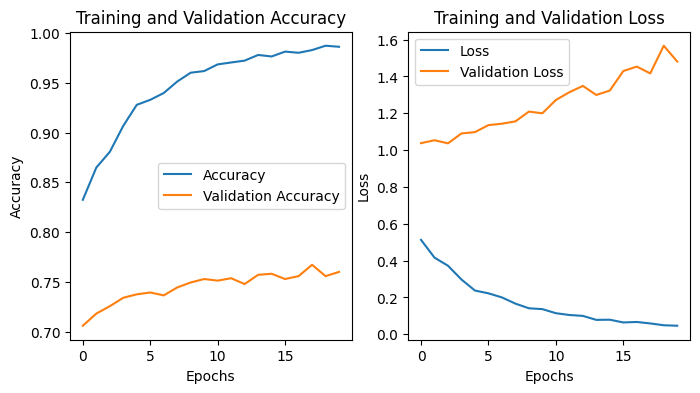

In [7]:
# Training history
history_dict = history_lstm.history
# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()


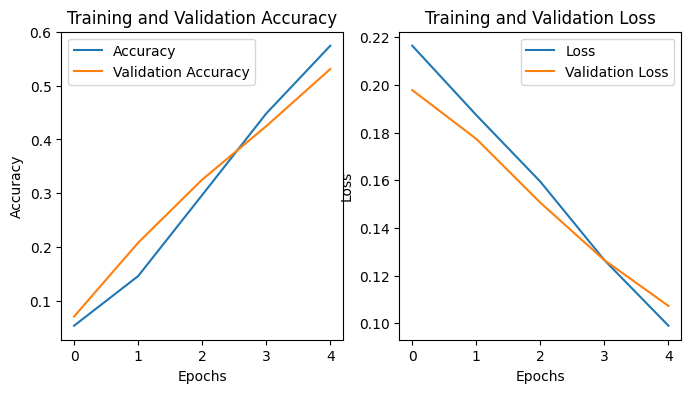

In [13]:
# Training history
history_dict = history_rnn.history
# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()


### Step 10: Classify a Sample Text

In [15]:
# Sample text to predict
sample_text = (
    '''The movie was so good and the animation are so dope.
    I would recommend my friends to watch it.'''
)

# Tokenize and pad the sample text
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts([sample_text])  # Fitting on the sample text to tokenize
sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=200, padding='post')

# Make prediction
predictions = lstm_model.predict(sample_padded)
print(*predictions[0])

# Print the label based on the prediction
if predictions[0][0] > 0:
    print('The review is positive')
else:
    print('The review is negative')


1/1 [==============================] - 0s 65ms/step
5.0786716e-06 0.1385555 0.009712237 0.0026059037 0.012816883 0.002863856 0.000121230805 0.0020629824 1.3941241e-05 0.07488136 5.047296e-06 0.012727852 0.66290474 0.017354352 0.061874073 0.0011816309 0.00015028066 4.0080016e-07 2.484866e-05 0.00013780379
The review is positive


In [16]:
# Sample text to predict
sample_text = (
    '''The movie was so good and the animation are so dope.
    I would recommend my friends to watch it.'''
)

# Tokenize and pad the sample text
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts([sample_text])  # Fitting on the sample text to tokenize
sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=200, padding='post')

# Make prediction
predictions = rnn_model.predict(sample_padded)
print(*predictions[0])

# Print the label based on the prediction
if predictions[0][0] > 0:
    print('The review is positive')
else:
    print('The review is negative')


1/1 [==============================] - 2s 2s/step
0.0002149447 0.04437216 0.010821061 0.09334224 0.12751004 0.008632409 0.038990155 0.02323338 0.0019168322 0.0025973544 0.00058997306 0.0012224668 0.122809805 0.001957343 0.007514183 0.00021433852 0.00047716015 9.696133e-06 0.04894506 0.00032086245
The review is positive


#**Well done =)**